# <font color='blue'>Python para Ciência de Dados</font>
# <font color='blue'>Capítulo 11</font>


In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste Jupyter Notebook:', python_version())

Versão da Linguagem Python usada neste Jupyter Notebook: 3.10.12


# Módulos para Análise de Dados

## SciPy

Para instalar a biblioteca científica SciPy, abra o prompt de comando e digite: pip install scipy

In [2]:
# !pip install scipy

Para importar o scipy, utilize: import scipy

In [3]:
import scipy

In [4]:
# Verificando a versão
scipy.__version__

'1.9.3'

### Integração com NumPy

In [5]:
# Importando o numpy
import numpy as np

In [6]:
# Importando todos os módulos do numpy
from numpy import *
from scipy.integrate import quad, dblquad, tplquad

In [7]:
# Integração
val, abserr = quad(lambda x: exp(-x ** 2),  Inf, Inf)
val, abserr

(0.0, 0.0)

In [8]:
from scipy.integrate import odeint, ode

In [9]:
# Integrando com matplotlib
from pylab import *
%matplotlib inline

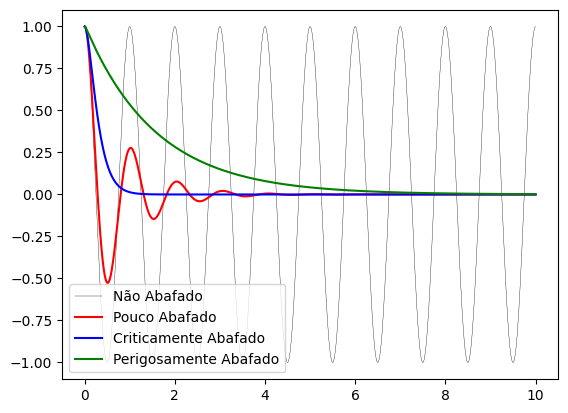

In [10]:
def dy(y, t, zeta, w0):
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]


y0 = [1.0, 0.0]

t = linspace(0, 10, 1000)
w0 = 2*pi*1.0


y1 = odeint(dy, y0, t, args=(0.0, w0)) 
y2 = odeint(dy, y0, t, args=(0.2, w0)) 
y3 = odeint(dy, y0, t, args=(1.0, w0)) 
y4 = odeint(dy, y0, t, args=(5.0, w0)) 

fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label="Não Abafado", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="Pouco Abafado")
ax.plot(t, y3[:,0], 'b', label="Criticamente Abafado")
ax.plot(t, y4[:,0], 'g', label="Perigosamente Abafado")
ax.legend();

In [18]:
# Interpolação de dados
from scipy import interpolate

x = [0, 1, 2, 3, 4, 5]
y = [0, 2, 4, 6, 8, 10]

f = interpolate.interp1d(x, y)

x_interp = np.linspace(0, 5, 10)
y_interp = f(x_interp)

print("Valores interpolados:", y_interp)

Valores interpolados: [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


### Transformada de Fourier

In [11]:
from scipy.fftpack import *

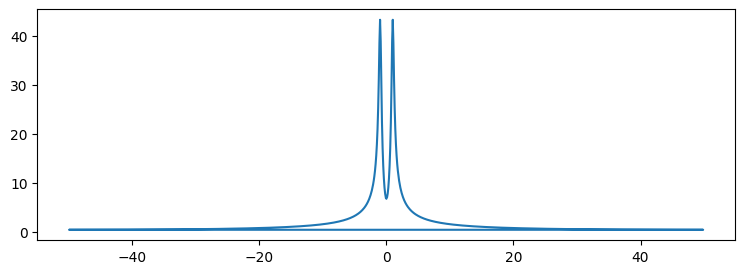

In [12]:
# Fourier transformation
N = len(t)
dt = t[1]-t[0]

F = fft(y2[:,0]) 

w = fftfreq(N, dt)

fig, ax = subplots(figsize=(9,3))
ax.plot(w, abs(F));

### Operações de Álgebra Linear

In [13]:
A = np.array([[5, 1, 0], [1, -1, 0], [0, 5, 1]])
B = np.array([2, 8, -3])

In [14]:
# Resolvendo um sistema de equações lineares
x = solve(A, B)

x

array([ 1.66666667, -6.33333333, 28.66666667])

In [15]:
A = rand(3,3)
B = rand(3,3)

evals, evecs = eig(A)

evals

array([ 1.66538944,  0.49640386, -0.32088176])

In [16]:
evecs

array([[-0.10871501, -0.70951078, -0.04525571],
       [-0.78152172,  0.70385582, -0.60404554],
       [-0.61433285,  0.03437209,  0.79566381]])

In [17]:
svd(A)

(array([[-0.22363617,  0.61721163, -0.75434519],
        [-0.69651187, -0.64259463, -0.3192857 ],
        [-0.68180501,  0.45400654,  0.57360263]]),
 array([1.84552665, 0.6055525 , 0.23736893]),
 array([[-0.54787537, -0.6630309 , -0.51012019],
        [ 0.78556609, -0.19811685, -0.58620443],
        [-0.28760824,  0.72190009, -0.62939794]]))

### Estatística

In [19]:
from scipy import stats

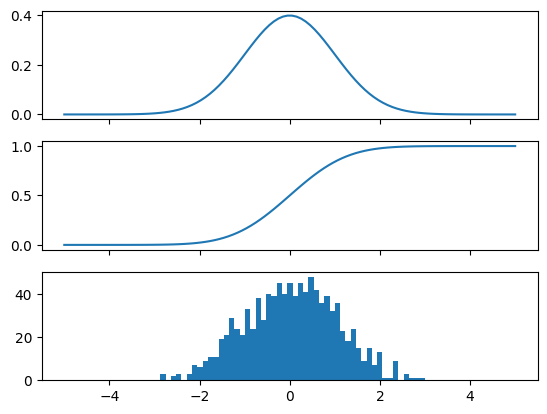

In [20]:
Y = stats.norm()

x = linspace(-5,5,100)

fig, axes = subplots(3,1, sharex=True)

axes[0].plot(x, Y.pdf(x))

axes[1].plot(x, Y.cdf(x));

axes[2].hist(Y.rvs(size=1000), bins=50);

In [21]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)

In [22]:
# T-test é um teste de hipótese
t_statistic, p_value = stats.ttest_ind(Y.rvs(size=1000), Y.rvs(size=1000))
t_statistic, p_value

(-0.7606165853110048, 0.44697586037828607)

## Fim